## Outliers Detection & Replacement

This notebook provides few lines of code to detect outliers from an array

[6, 17]
[46, 86]


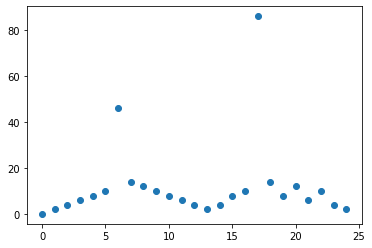

In [12]:
# We start by importing the required librairies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#The column is to be evaluated is provided as follows

values =[0,2,4,6,8,10,46,14,12,10,8,6,4,2, 4,8,10,86, 14,8,12,6,10,4,2]

X= np.arange(len(values))  #This column can be used to generate a scatter plot to display the distribution of the data points of "values"


# We create a function that returns the boundaries of the distribution 

def outliers_detection(value, Q1, Q3):
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return value <= lower or value >= upper 

# Then we construct a function that will return the index(es) of detected outlier(s)

def outliers_position(values):
  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)

  Outlier =[]
  for ind, value in enumerate(values):
    if outliers_detection(value, Q1, Q3):
      Outlier.append(ind)
  return Outlier 

#The following lines of codes provide the value of the identified outlier(s)

def outliers_value(values):
  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)

  O_value =[]
  for ind, value in enumerate(values):
    if outliers_detection(value, Q1, Q3):
      O_value.append(value)
  return O_value 



print(outliers_position(values))
print(outliers_value(values))

plt.scatter(X, values)
plt.show()


<function matplotlib.pyplot.show>

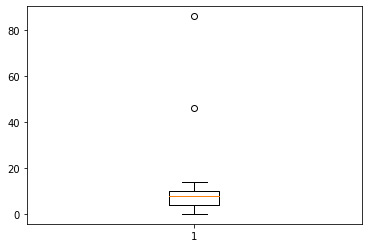

In [13]:
plt.boxplot(values)
plt.show

In [ ]:
#Let's delete the outlier from the array, which will allow us to compute the mean of the distribution 

clean_values=np.delete(values, outliers_position(values))
clean_values


array([ 0,  2,  4,  6,  8, 10, 14, 12, 10,  8,  6,  4,  2,  4,  8, 10, 14,
        8, 12,  6, 10,  4,  2])

[ 0  2  4  6  8 10  7 14 12 10  8  6  4  2  4  8 10  7 14  8 12  6 10  4
  2]


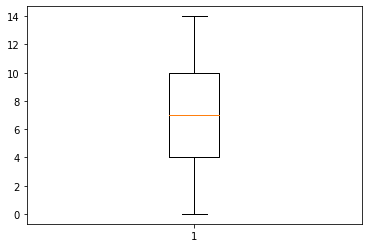

In [14]:
# The following lines of codes replace outliers with the mean, which is calculated after extracting the outliers from the initial distribution

import statistics 
values_df = pd.DataFrame(values)
a = outliers_value(values)
b = statistics.mean(np.delete(values, outliers_position(values)))
n = values_df.replace(a,b)
new_data =n.values.flatten()
print(new_data)
plt.boxplot(new_data)
plt.show()

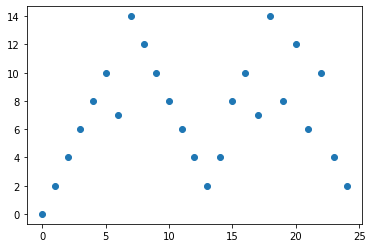

In [15]:
plt.scatter(X,new_data)
plt.show()